__Задача 1__

Даны значения зарплат из выборки выпускников: 
```
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150
```
Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек `numpy`, `pandas` и др.) посчитать среднее арифметическое, выборочную дисперсию, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием библиотек, чтобы проверить себя.

In [2]:
salaries = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

In [8]:
import pandas as pd
import numpy as np

In [11]:
salaries_df = pd.DataFrame(salaries, columns = ['salary'])

In [7]:
# Вычислим среднее арифметическое
mean_salary = sum(salaries) / len(salaries)
mean_salary

73.14285714285714

In [13]:
# Проверка
salaries_df.mean()

salary    73.142857
dtype: float64

In [22]:
# Выборочная дисперсия
_ = [(x - mean_salary)**2 for x in salaries]
variance = sum(_)/(len(salaries) - 1)
variance

2241.8285714285716

In [18]:
# Проверка
salaries_df.var(ddof=1)

salary    2241.828571
dtype: float64

In [21]:
# Cреднее квадратичное отклонение
standard_deviation = dispersion ** 0.5
standard_deviation

47.34795213553139

In [23]:
# Проверка
salaries_df.std(ddof=1)

salary    47.347952
dtype: float64

__Задача 2__

Для выборки из задачи 1 найти (также без использования библиотек):
1. медиану, первый и третий квартили, интерквартильное расстояние,
2. выборсы в выборке (используя для этого метод как при построении "усов" из `boxplot`). 

Возможные неоднозначности в вычислении квантилей можно разрешать любым способом.

In [36]:
# Медиана
salaries.sort() # отсортируем список по возрастанию
len(salaries) # 21
median = salaries[(len(salaries) // 2)]
median

70

In [37]:
# Проверка
salaries_df.median()

salary    70.0
dtype: float64

In [39]:
# Первый квартиль
q1 = salaries[len(salaries) // 4]
q1

45

In [41]:
# Проверка
salaries_df.quantile(0.25)

salary    45.0
Name: 0.25, dtype: float64

In [42]:
# Третий квартиль
q3 = salaries[3 * (len(salaries) // 4)]
q3

84

In [43]:
# Проверка
salaries_df.quantile(0.75)

salary    84.0
Name: 0.75, dtype: float64

In [50]:
# Интерквртильное расстояние
iqr = q3 - q1
iqr

39

In [49]:
# Проверка
salaries_df.quantile(0.75) - salaries_df.quantile(0.25)

salary    39.0
dtype: float64

In [51]:
# Выбросы
outliers = [i for i in salaries if i < q1 - 1.5*iqr or i > q3 + 1.5*iqr]

In [52]:
outliers

[150, 230]

In [53]:
import seaborn as sns

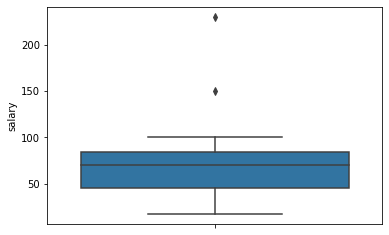

In [55]:
sns.boxplot(y = 'salary', data=salaries_df)

__Задача 3__

В университет на факультет A поступило 100 человек, на факультет B - 90 человек и на факультет C - 45 человек. Вероятность того, что студент с факультета A сдаст первую сессию, равна 0.6. Для студента с факультета B эта вероятность равна 0.7, а для студента с факультета C - 0.8. Случайным образом выбирается студент, сдавший первую сессию. Какое событие наиболее вероятно:
1. студент учится на факультете A,
2. студент учится на факультете B,
3. студент учится на факультете C?

_Замечание_: да, эта задача не на тему статистики, но тема важная, и её стоит иногда освежать в памяти.

Случайным образом выбираем студента. Всего на трех факультетах у нас 100+90+45 = 235 человек. Тогда можно рассчитать вероятности, что случайно выбранный студент окажется студентом определенного факультета:

P(A)= m / n = 100 / 235 = 0.43

P(B)= 90 / 235 = 0.38


P(C)= 45 / 235 = 0.19




Нам даны вероятности сдачи сессии студентов разных факультетов. Мы можем найти полную вероятность того что случайный студент сдаст сессию

P(+) = P(A) * P(A+) + P(B) * P(B+) + P(C) * P(C+) = 0.43 * 0.6 + 0.38 * 0.7 + 0.19 * 0.8 = 0.676


Теперь по формуле Байеса можем определить вероятность того что студент окажется на определенном факультете при уловии, что он сдал экзамен

P(A|+) = P(A) * P(A+) / P(+) = 0.43 * 0.6 / 0.676 = 0.381

P(B|+) = P(B) * P(B+) / P(+) = 0.38 * 0.7 / 0.676 = 0.393

P(C|+) = P(C) * P(C+) / P(+) = 0.19 * 0.8 / 0.676 = 0.225



Следовательно вероятней всего случайно выбранный студент, сдавший тест учится на факультете B.